# Gradients

refs: 
* https://stackabuse.com/gradient-descent-in-python-implementation-and-theory/
* https://www.youtube.com/watch?reload=9&v=Ne3hjpP7KSI
* https://github.com/bhattbhavesh91/gradient-descent-variants
* math demonstrations:
    * https://stats.stackexchange.com/questions/278771/how-is-the-cost-function-from-logistic-regression-derivated/278812 
    * https://medium.com/analytics-vidhya/derivative-of-log-loss-function-for-logistic-regression-9b832f025c2d
    * https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html

**TODO:**
* Look this explanation of beter cost function for logistic regression: https://www.internalpointers.com/post/cost-function-logistic-regression


In [1]:
import numpy as np
import random as rand

import  matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.datasets import make_classification, make_blobs, make_regression

from typing import List, Set, Dict, Tuple, Optional, Union

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

## Gradient descent


In machine learning we define the the cost fucntion as:

$
J_X(\theta) = \frac{1}{2n} \sum_i^n \left ( h_{\theta}(x_i) - y_i \right )^2
$

where $\theta$ are paremeters of the models, $X$ is the trainning data and $y_i$ are the labels. Notices that the cost function $J_X(\theta)$ depends of the trainning data $X$ as well, but considered only a fucntion of the parameters $\theta$. 

From calclulus, 

$
d J(\theta) = \nabla_{\theta} J_X(\theta) * d\theta
$

where $*$ is the scalar product or inner product. Because the $cos(a)$ function is maximun when $a=0$ ($d\theta$ and $\nabla_{\theta}$ are aligned in this situation), we know that the opposite direction of the gradient point to the direction that minimizes the cost function $J(\theta)$.

> PS: The opposite direction $\nabla_{\theta}J(\theta)$ minimizes the cost function. The gradient is a compass that instead of point North, it is always point downhill.


The algorithm is summarized as follow:
    
1. Start form a random point $\theta = \theta_0$

1. Repeat the steps

    1. update direction (step): $\Delta \theta = -\eta \nabla_{\theta}J(\theta)$
    
    1. update the position: $\theta = \theta + \Delta \theta$
    
where $\eta$ is the learning rate. 



## Examples of cost functions and Gradient descent

### Linear Rgression

$
J_X(\theta) = \frac{1}{2n} \left ( X \theta - y \right )^t\left ( X \theta - y \right )
$


$
\nabla_{\theta}J_X(\theta) = X^t \left ( X\theta - y \right )
$

In [2]:
# X: matrix nxd
# y: column vector nx1
# theta: column vector dx1

def cost_func_linear_regression(theta, X, y):
    
    n = X.shape[0]
    
    z = np.dot(X,theta) - y

    return np.dot(z.T,z)/2/n

def gradient_linear_regression(theta,X,y):
    
    z = np.dot(X,theta) - y    
    grad = np.matmul(X.T,z)
    
    #print(f"theta.shape: {theta.shape}; X.shape: {X.shape}; z.shape: {z.shape}; grad.shape: {grad.shape}")
    
    return grad

(300, 1)

(300,)

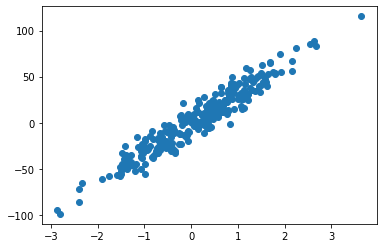

In [3]:
X, y = make_regression(n_samples = 300, 
                       n_features=1, 
                       n_informative=1, 
                       noise=10,
                       random_state=2021)
X.shape
y.shape
#plt.scatter(X[:,0],X[:,1])
plt.scatter(X,y)

### Logistic Regression Sigmoid activation

* vectorized formula of the cost function: https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html

$
J_X(\theta) = \frac{1}{n} \sum_i^n \left ( y^i log(h_{\theta}(x_i)) - (1 - y_i) log(1 - h_{\theta}(x_i)) \right ) \\
J_X(\theta) = - \frac{1}{n} \left ( y^t log(h(X\theta)) + (1 - y)^t log(1 - h(X\theta))  \right )
$


$
\nabla_{\theta}J_X(\theta) = X^t \left ( \sigma(X\theta) - y) \right )
$

where:

$
h(X\theta) = h(z) = \sigma(z) \equiv \frac{1}{1 + e^{-z}} \\
\frac{\partial}{\partial z} \sigma(z) = \sigma(z) (1 - \sigma(z))  \\
$


In [4]:
# X: matrix nxd
# y: column vector nx1
# theta: column vector dx1

def cost_func_logistic_regression(theta, X, y):
    
    n = X.shape[0]
    z = np.dot(X,theta)  # nx1
    h = 1.0/(1.0 + np.exp(-z))  # activation: nx1
    
    cost = (-1.0/n)*(y^t*np.log(h) + (1-y)^t*(np.log(1-h))) # scalar
    
    return cost

def gradient_logistic_regression(theta,X,y):
    
    z = np.dot(X,theta)
    h = 1.0/(1.0 + np.exp(-z))  # activation
    
    return np.matmul(X.T,h - y)

## Batch Gradient descent



Batch gradient descent computes the gradient using the whole dataset. 

In [5]:
def gradient_descent(X,y, cost_func, gradient_func, learning_rate = 0.01, n_iterations = 100):
    
    n = X.shape[0] # training size
    d = X.shape[1]  # number of dimensions or paramters
    
    theta_history = np.zeros((n_iterations,d))
    grad_history = np.zeros((n_iterations,d))
    cost_history = np.zeros(n_iterations)
    
    # init guess
    theta = np.random.randn(d)
    cost_at_theta = cost_func(theta,X,y)
    gradient_at_theta = gradient_func(theta,X,y)
    
    theta_history[0, :] = theta.T
    grad_history[0,:] = gradient_at_theta.T
    cost_history[0] = cost_at_theta
    
    #print(f"theta0: {theta}")
    for it in range(1,n_iterations):

        # computebgradients and cost function
        cost_at_theta = cost_func(theta,X,y)
        gradient_at_theta = gradient_func(theta,X,y)

        # update parameters
        dtheta = -learning_rate* gradient_at_theta
        theta = theta + dtheta
        
        # log history for oploting
        theta_history[it, :] = theta.T
        grad_history[it,:] = gradient_at_theta.T
        cost_history[it] = cost_at_theta
        
        #print(f"{it}: => theta: {theta.T}; grad: {gradient_at_theta.T}; cost: {cost_at_theta} ")
        #print(f"{it}: => theta.shape: {theta.shape}; grad.shape: {gradient_at_theta.shape}; cost: {cost_at_theta} ")

    history = {'theta': theta_history, "cost": cost_history, "grad": grad_history}

    return theta, history

* Training 

In [6]:
%%time
lr = 0.001
n_iter = 100

theta, history = gradient_descent(X, y, cost_func_linear_regression, gradient_linear_regression, lr, n_iter)

print()
theta0 = history['theta'][0]
grad0 =  history['grad'][0]
cost0 = history['cost'][0]

print(f"Initial Guess it: 0 => theta: {theta0}; grad: {grad0}; cost: {cost0:.2f}")

it = n_iter -1
theta = history['theta'][it]
grad =  history['grad'][it]
cost = history['cost'][it]

print(f"it: {it} => theta: {theta}; grad: {grad}; cost: {cost:.2f}")



Initial Guess it: 0 => theta: [0.60014224]; grad: [-9560.24354931]; cost: 544.19
it: 99 => theta: [31.96161862]; grad: [-3.44391182e-12]; cost: 44.49
CPU times: user 0 ns, sys: 5.32 ms, total: 5.32 ms
Wall time: 3.88 ms


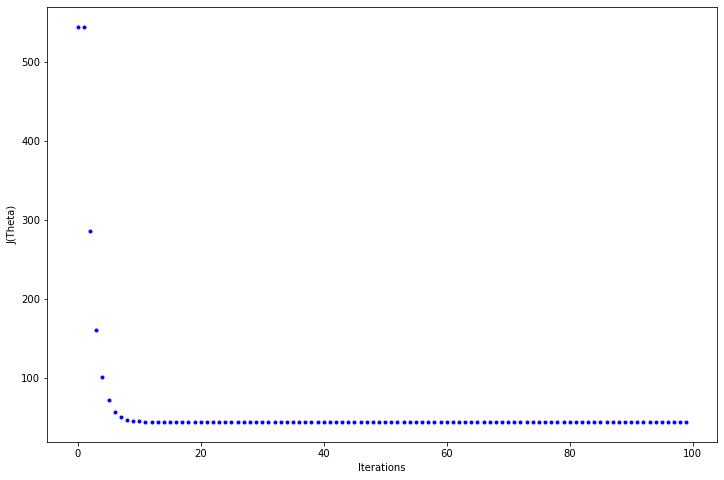

In [7]:
fig,ax = plt.subplots(figsize=(12,8))
ax.set_ylabel('J(Theta)');
ax.set_xlabel('Iterations');
_=ax.plot(range(n_iter),history['cost'],'b.');

* Checking the fit

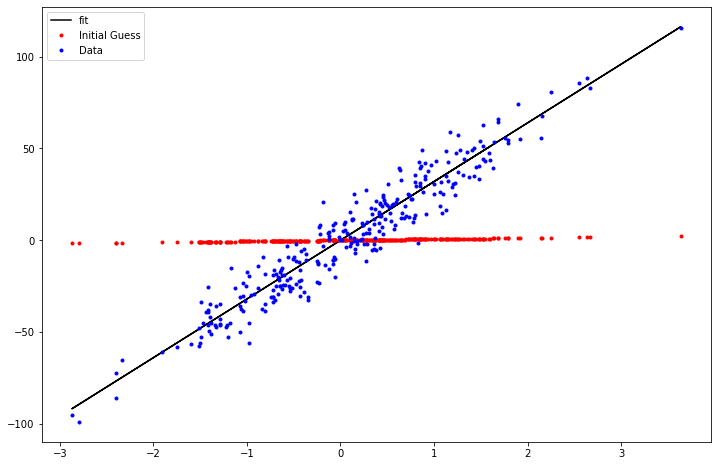

In [8]:
y_pred0 = np.dot(X,theta0)
y_pred = np.dot(X,theta)

fig,ax = plt.subplots(figsize=(12,8))
_= ax.plot(X,y_pred,c='black', label='fit');
_= ax.plot(X,y_pred0,'r.', label='Initial Guess');
_= ax.plot(X,y,'b.', label='Data');
ax.legend();

* Gradient exploding example due to learn rating is too big

In [9]:
%%time
lr = 0.1
n_iter = 3

theta_big, history_big = gradient_descent(X, y, cost_func_linear_regression, gradient_linear_regression, lr, n_iter)

print()
theta0 = history_big['theta'][0]
grad0 =  history_big['grad'][0]
cost0 = history_big['cost'][0]

print(f"Initial Guess it: 0 => theta: {theta0}; grad: {grad0}; cost: {cost0:.2f}")

it = n_iter -1
theta = history_big['theta'][it]
grad =  history_big['grad'][it]
cost = history_big['cost'][it]

print(f"it: {it} => theta: {theta}; grad: {grad}; cost: {cost:.2f}")


Initial Guess it: 0 => theta: [-0.61665076]; grad: [-9931.17115763]; cost: 583.72
it: 2 => theta: [-28288.5996861]; grad: [292811.00151101]; cost: 468805.05
CPU times: user 1.75 ms, sys: 116 µs, total: 1.86 ms
Wall time: 1.75 ms


* Learning rate is too small

In [10]:
%%time
lr = 1e-5
n_iter = 100

theta, history_small = gradient_descent(X, y, cost_func_linear_regression, gradient_linear_regression, lr, n_iter)

print()
theta0 = history_small['theta'][0]
grad0 =  history_small['grad'][0]
cost0 = history_small['cost'][0]

print(f"Initial Guess it: 0 => theta: {theta0}; grad: {grad0}; cost: {cost0:.2f}")

it = n_iter -1
theta = history_small['theta'][it]
grad =  history_small['grad'][it]
cost = history_small['cost'][it]

print(f"it: {it} => theta: {theta}; grad: {grad}; cost: {cost:.2f}")


Initial Guess it: 0 => theta: [-0.24836065]; grad: [-9818.90146778]; cost: 571.60
it: 99 => theta: [8.15357619]; grad: [-7279.84397428]; cost: 334.23
CPU times: user 2.77 ms, sys: 2.6 ms, total: 5.37 ms
Wall time: 3.59 ms


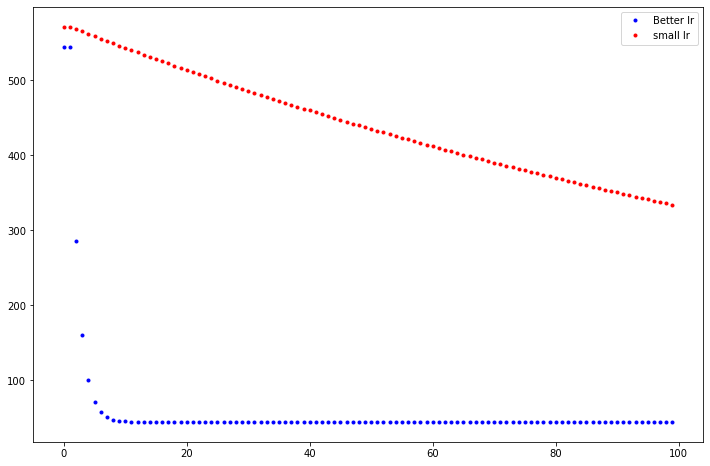

In [11]:
fig,ax = plt.subplots(figsize=(12,8))
_=ax.plot(range(n_iter),history['cost'],'b.',label='Better lr');
_=ax.plot(range(n_iter),history_small['cost'],'r.',label='small lr');
ax.legend();

* 2d example with vector field
https://stackoverflow.com/questions/63843310/how-to-plot-gradient-vector-on-contour-plot-in-python

plot vector field
https://krajit.github.io/sympy/vectorFields/vectorFields.html

(300, 2)

(300,)

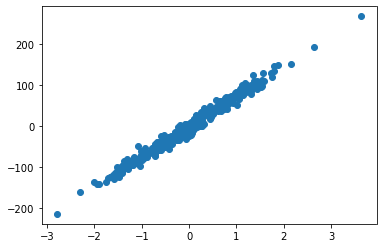

In [14]:
n = 300
d = 2
X, y = make_regression(n_samples = n, 
                       n_features= d, 
                       n_informative=1, 
                       noise=10,
                       random_state=2021)
X.shape
y.shape
plt.scatter(X[:,0],y)

In [13]:
%%time
lr = 0.001
n_iter = 100

theta, history = gradient_descent(X, y, cost_func_linear_regression, gradient_linear_regression, lr, n_iter)

print()
theta0 = history['theta'][0]
grad0 =  history['grad'][0]
cost0 = history['cost'][0]

print(f"Initial Guess it: 0 => theta: {theta0}; grad: {grad0}; cost: {cost0:.2f}")

it = n_iter -1
theta = history['theta'][it]
grad =  history['grad'][it]
cost = history['cost'][it]

print(f"it: {it} => theta: {theta}; grad: {grad}; cost: {cost:.2f}")


Initial Guess it: 0 => theta: [-1.4123781   0.42861078]; grad: [-20215.79397616    715.62994865]; cost: 2574.65
it: 99 => theta: [ 7.35823502e+01 -4.68224452e-02]; grad: [-1.00253672e-09 -1.80335746e-10]; cost: 47.28
CPU times: user 0 ns, sys: 4.79 ms, total: 4.79 ms
Wall time: 3.2 ms


In [20]:
thetas = history['theta']
theta_min = np.min(thetas,axis=0)
theta_max = np.max(thetas,axis=0)

theta1,theta2 = np.meshgrid(np.linspace(theta_min[0],theta_max[0],n_iter),np.linspace(theta_min[1],theta_max[1],n_iter))

grads = 

# gradients
u = np.array([ grad[0]/np.norm(grad) for grad in history['grad']])
v = np.array([ grad[1]/np.norm(grad) for grad in history['grad']])

fig, ax = plt.subplots(1, 1)
ax.set_aspect(1)
ax.plot(theta1, theta2, c='k')
ax.quiver(x, y, u, v, units='xy', scale=0.5, color='gray')
ax.contour(x, y, z, 10, cmap='jet', lw=2)

In [ ]:
n = 3
d = 2

theta_history = np.zeros((n,d))

theta = np.random.randn(d)

theta.shape
theta

z = np.dot(X,theta)

z.shape

theta_history.shape

theta_history[0,:] = theta.T


theta_history